In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# 그래프 그리기
%matplotlib inline
# 폰트설정
plt.rc('font', family = 'Malgun Gothic')
# 마이너스 폰트 깨짐 현상 해결
plt.rc('axes', unicode_minus = False)

# 폰트선명히
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/소상공인시장진흥공단_상가업소정보_의료기관_201909/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding = 'utf8', low_memory = False)
df.shape

(91335, 39)

In [3]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

 * 칼럼 총 39개 중 데이터 타입은 문자형 23개 ,정수형 7개, 소수점 9개
 * 결측값이 존재하는 것을 알 수 있다.

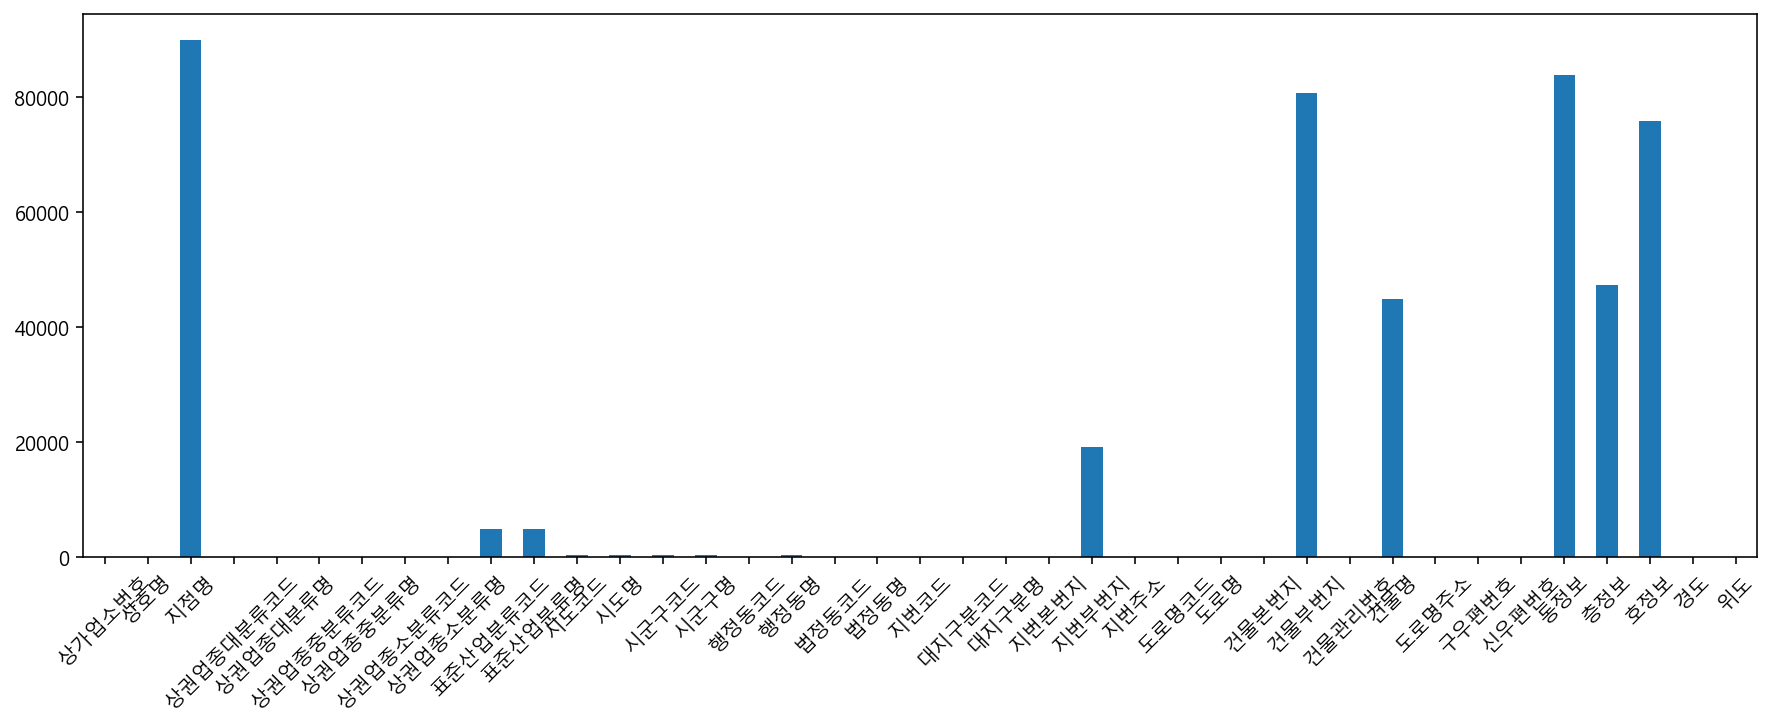

In [5]:
# 각 칼럼의 결측치 개수 파악
null_count = df.isnull().sum()
null_count.plot.bar(figsize = (15, 5), rot = 45)
# bar로 하면 다음과 같은 결과 출력
# barh는 x축 y축 반전

In [6]:
# reset_index()는 데이터프레임으로 만듦
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [7]:
df_null_count.columns = ['칼럼 명', '결측치 수']
df_null_count.head()

,칼럼 명,결측치 수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [8]:
df_null_count.sort_values(by = "결측치 수", ascending = False).head(10)

,칼럼 명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [9]:
df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [10]:
df_null_count_top = df_null_count.sort_values(by = "결측치 수", ascending = False).head(10)
drop_columns = df_null_count_top["칼럼 명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [11]:
display(df[drop_columns].head())
display(df[drop_columns].shape)

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


(91335, 10)

In [12]:
print(df.shape)
df = df.drop(drop_columns, axis = 1)    # axis = 0 이 디폴트인데 행을 기준으로 제거한다.
print(df.shape)

(91335, 39)
(91335, 29)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [14]:
df["위도"].mean()

36.62471119236673

In [15]:
df["위도"].median()

37.23465231770329

In [16]:
df["위도"].max()

38.499658570559795

In [17]:
df["위도"].min()

33.2192896688307

In [18]:
df["위도"].count()

91335

In [19]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [20]:
df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [21]:
df.describe(include = "object")    # 결측치 데이터는 자동 제외

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


 # 중복제거한 값을 출력

In [22]:
# '상권업종대분류명'

df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [23]:
df['상권업종대분류명'].nunique()

1

In [24]:
# '상권업종중분류명'
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [25]:
df['상권업종중분류명'].nunique()

5

In [26]:
# '상권업종소분류명'
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [27]:
df['상권업종소분류명'].nunique()
#len(df['상권업종소분류명'].unique()

34

 # 그룹화 된 요약과 시각화

In [28]:
city = df['시도명'].value_counts()

In [29]:
city_normalize = df['시도명'].value_counts(normalize = True)

,응답 수,비율
경기도,21374,0.234993
서울특별시,18943,0.208266
부산광역시,6473,0.071166
경상남도,4973,0.054675
인천광역시,4722,0.051915
대구광역시,4597,0.050541
경상북도,4141,0.045528
전라북도,3894,0.042812
충청남도,3578,0.039338
전라남도,3224,0.035446


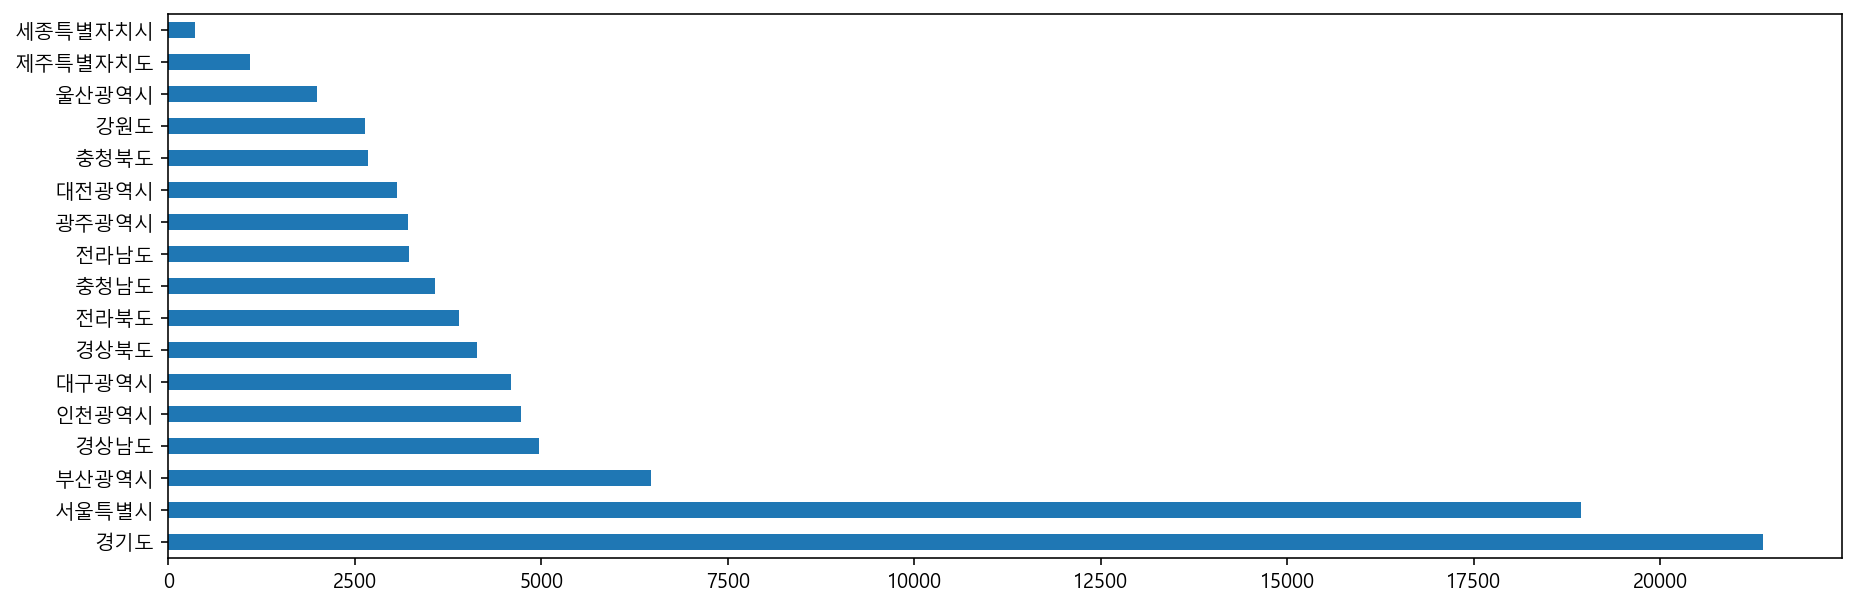

In [30]:
city_count = pd.DataFrame(city)
city_percent = pd.DataFrame(city_normalize)

city_df = city_count.merge(city_percent, left_index = True, right_index = True)
city_df.columns = ['응답 수', '비율']

display(city_df)
display(city.plot.barh(figsize = (15, 5)))

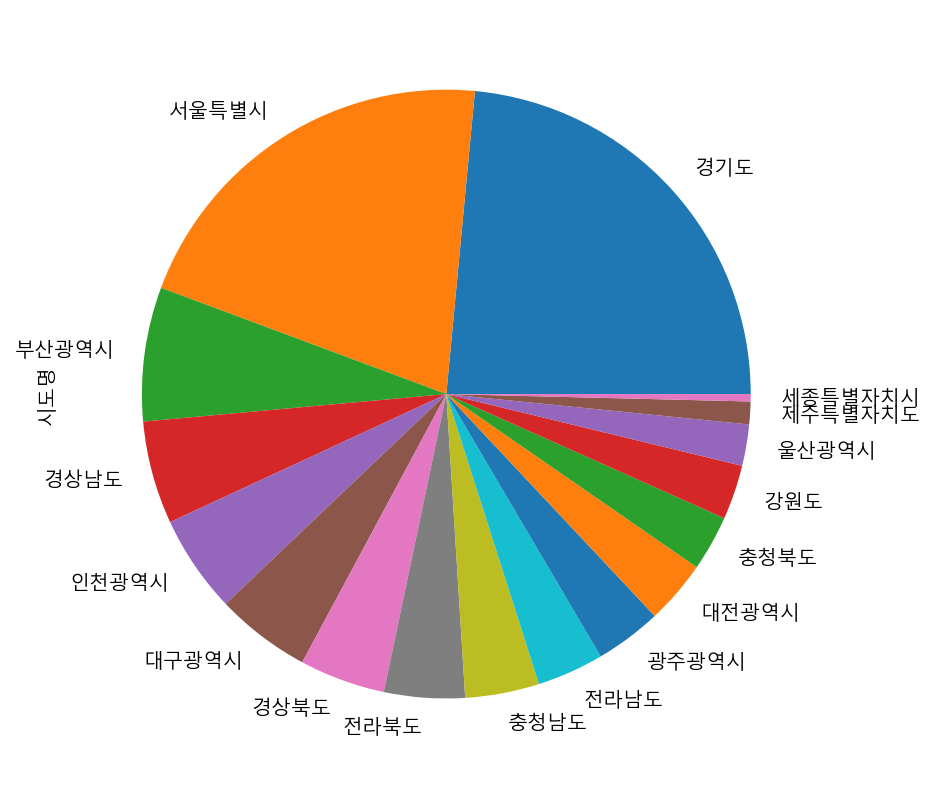

In [31]:
city.plot.pie(figsize = (7, 7))

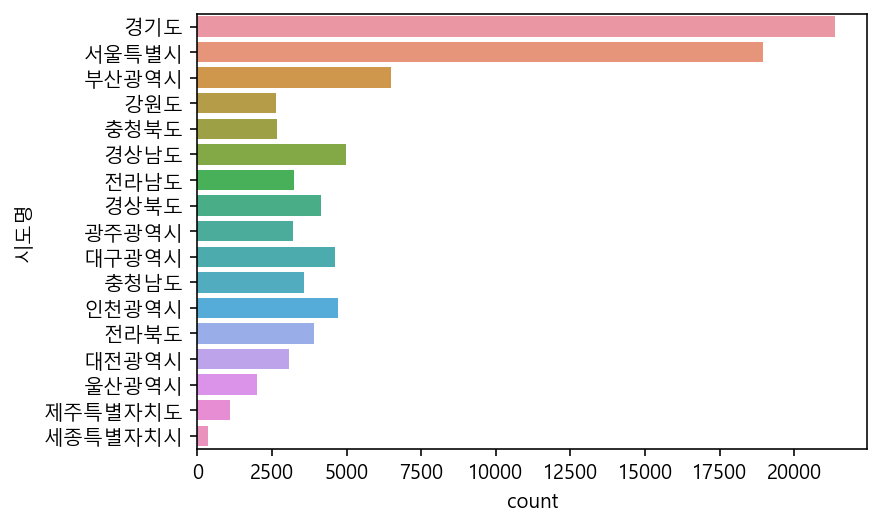

In [32]:
# 'c'로 지정하지 않고 그냥 출력하면 텍스트와 같이 그래프가 출력
# seaborn은 일부 그래프가 지원되지 않지만 디폴트가 보기 좋음
c = sns.countplot(data = df, y = '시도명')

In [33]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [34]:
a = df['상권업종중분류명'].value_counts()

In [35]:
b = df['상권업종중분류명'].value_counts(normalize = True)

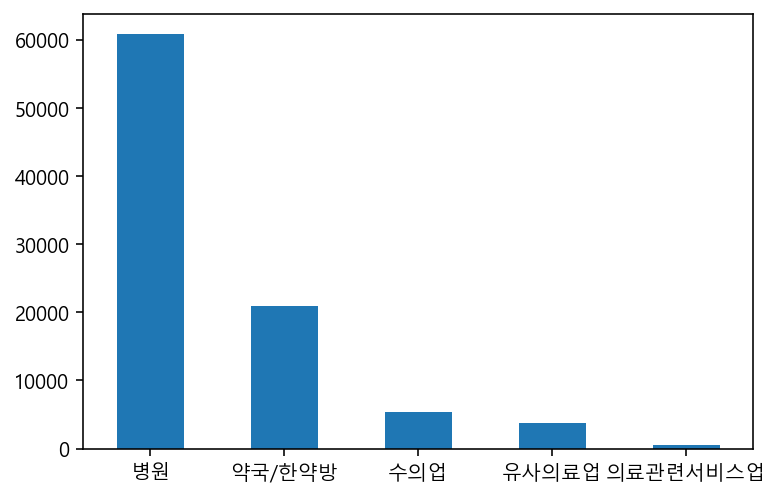

In [36]:
# 판다스 시각화 막대그래프 사용
a.plot.bar(rot = 0)

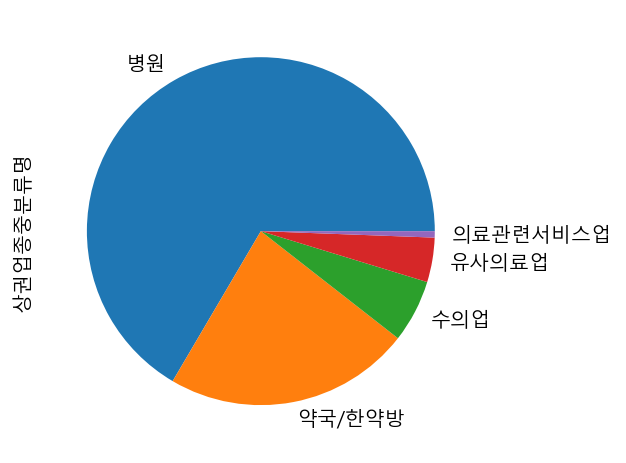

In [37]:
# 판다스 시각화 원그래프 사용
b.plot.pie()

In [38]:
d = df['상권업종소분류명'].value_counts()

In [39]:
e = df['상권업종소분류명'].value_counts(normalize = True)

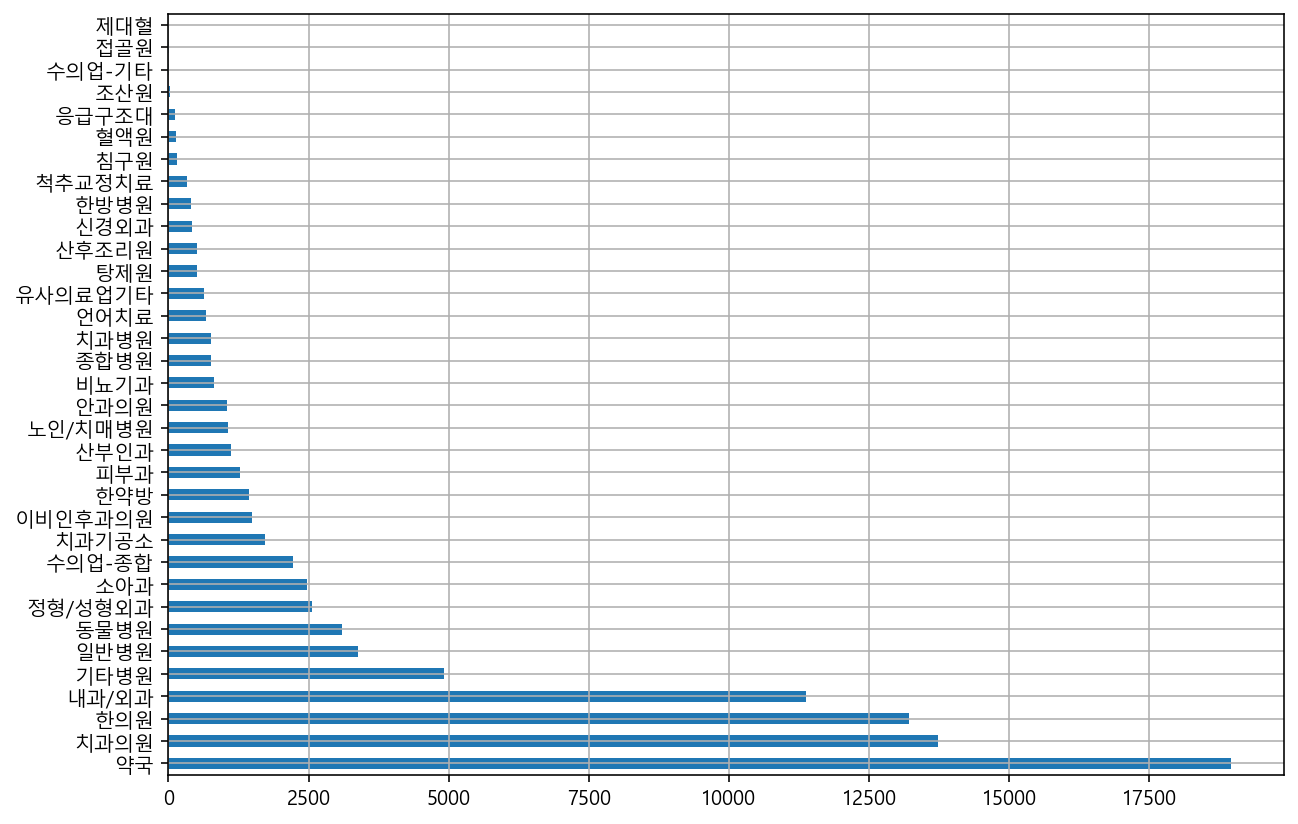

In [40]:
d.plot.barh(figsize = (10, 7), grid = True)

 # 데이터 색인

In [41]:
# '상권업종중분류명'칼럼 중 '약국/한약방'엔 데이터만 추출
df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()
df_medical.head(3)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355


In [42]:
# '상권업종대분류명'에서 '의료'만 추출한 뒤  value_counts를 통해 확인
df.loc[df['상권업종대분류명'] == '의료', '상권업종중분류명'].value_counts()
# m = df['상권업종대분류명'] == '의료'
# df.loc[m, '상권업종중분류명'].value_counts()
# 동일한 결과 출력

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [43]:
df_medi = df[df['상권업종중분류명'] == '유사의료업']
df_medi.shape

(3774, 29)

In [44]:
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [45]:
df_medi['상호명'].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
수치과기공소       10
고려수지침학회      10
제일치과기공소       9
대한응급환자이송단     8
미소치과기공소       8
어울림치과기공소      8
Name: 상호명, dtype: int64

 # 여러 조건으로 데이터 색인

In [46]:
df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
print(df_seoul_drug.shape)
df_seoul_drug.head(2)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135


# 구별로 데이터 보기

In [47]:
c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [48]:
n = df_seoul_drug['시군구명'].value_counts(normalize = True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

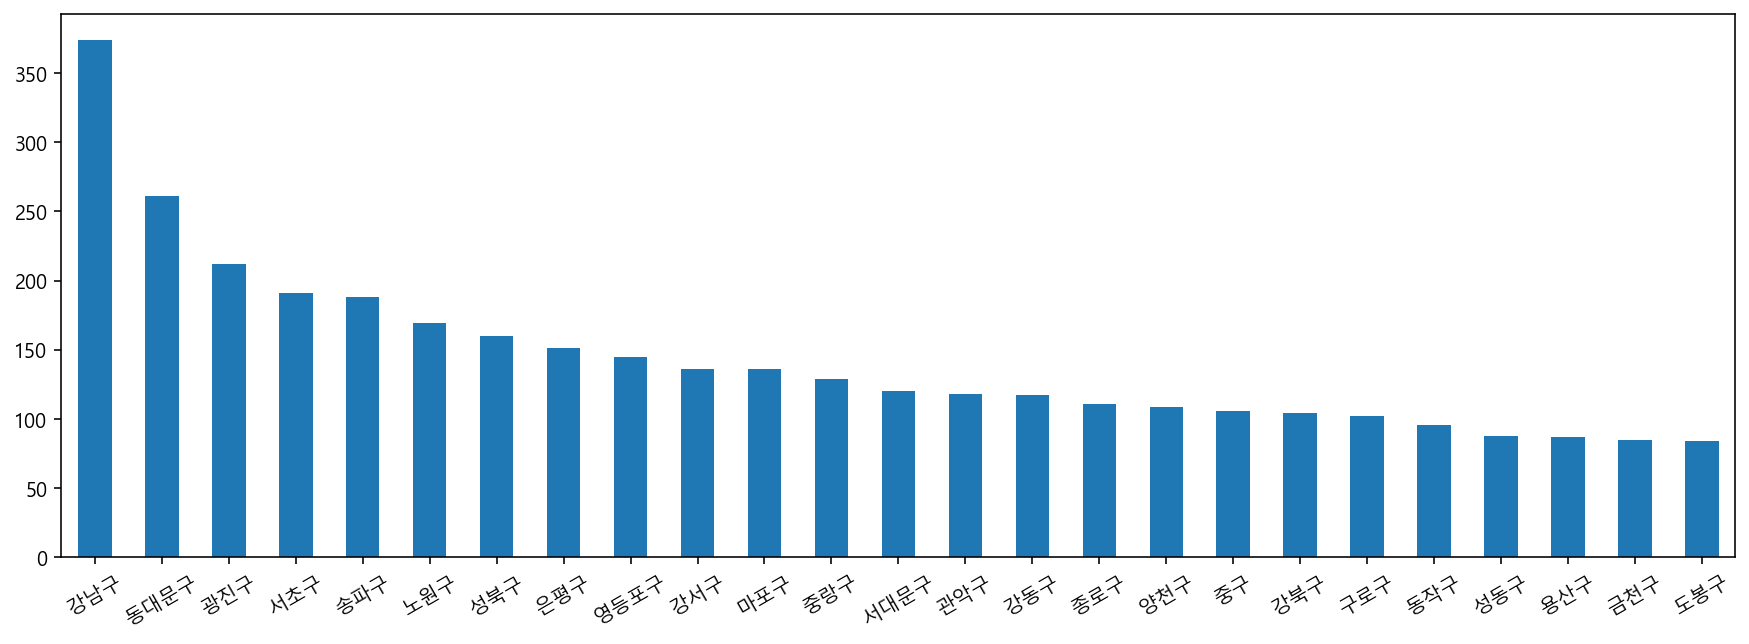

In [49]:
c.plot.bar(rot = 30, figsize = (15, 5))

## 상호명 칼럼에서 종합병원만 추출하기 위한 과정

In [50]:
df_seoul_hospital = df[(df['상권업종소분류명'] == '종합병원') & 
                       (df['시도명'] == '서울특별시')].copy()
df_seoul_hospital.head(2)
# 연산자 우선순위로 '()'를 활용하고, 판다스에서는 'and'가 아니라 '&'를 활용

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213


In [51]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
송파구      5
중구       5
서대문구     4
양천구      4
도봉구      4
강북구      4
성북구      3
관악구      2
중랑구      2
강서구      2
구로구      2
금천구      2
종로구      2
동대문구     2
성동구      2
노원구      2
동작구      1
용산구      1
마포구      1
은평구      1
Name: 시군구명, dtype: int64

In [52]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), 
                      '상호명'].unique()
# 상호명 칼럼에서 종합병원이 들어간 행을 찾아 표시하고 종합병원이 아닌 행을 표시하고 싶다면 맨 앞에 '~'을 입력한다.

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [53]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [54]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [55]:
# 걸러낼 애들 지정
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [56]:
# 추가적으로 지정
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [57]:
# 걸러낼 애들 합치기
drop_row = drop_row + drop_row2
len(drop_row)

33

In [58]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


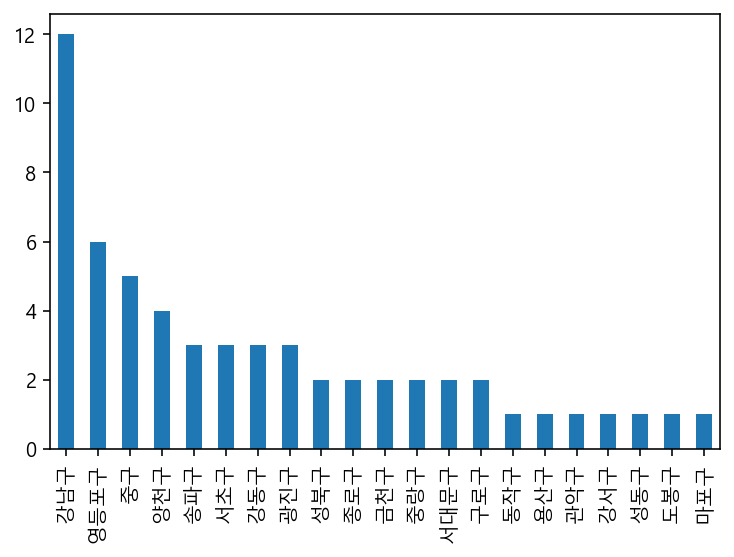

In [59]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

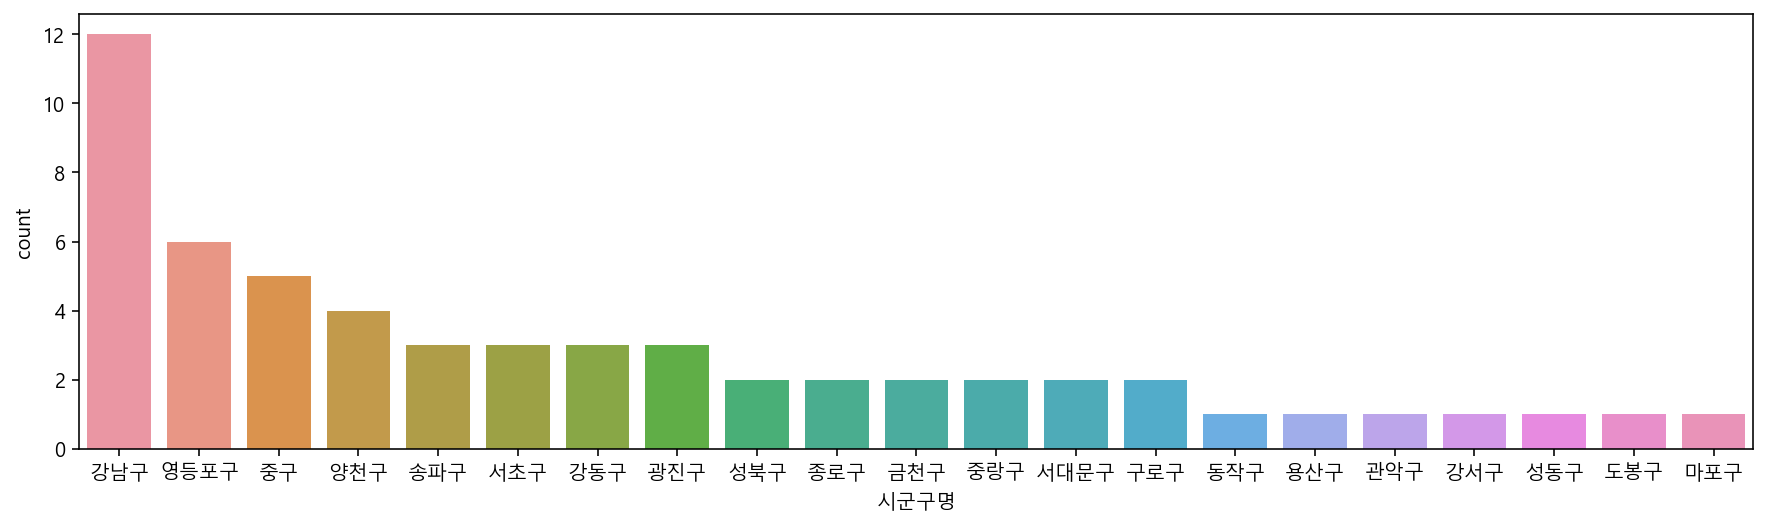

In [60]:
plt.figure(figsize = (15, 4))
sns.countplot(data = df_seoul_hospital, x = '시군구명', order = df_seoul_hospital['시군구명'].value_counts().index)
# order는 소팅

In [61]:
# 전처리 결과 확인
df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

 # 특정지역만 보기

In [62]:
# 전국에서 서울만 추출
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 29)

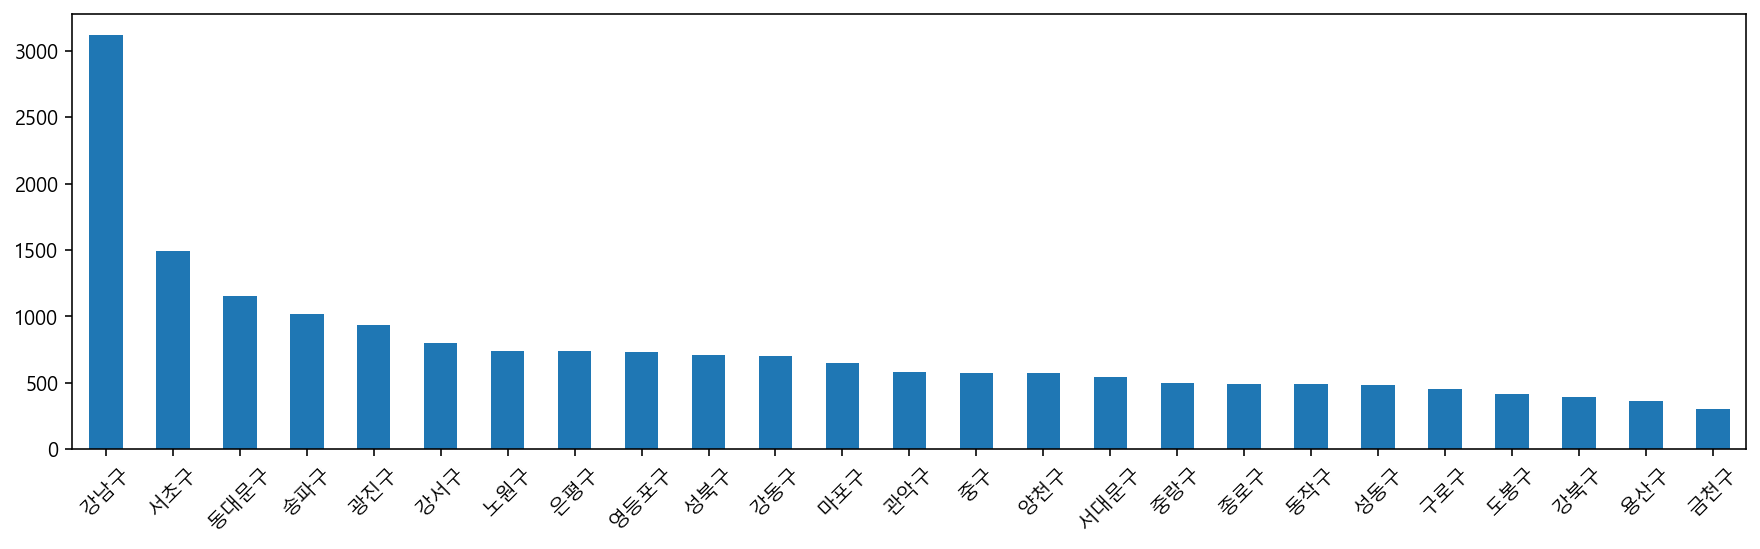

In [63]:
# 서울에서 지역구 나누고 분포를 파악하기 위한 시각화
df_seoul['시군구명'].value_counts().plot.bar(rot = 45, figsize = (15, 4))

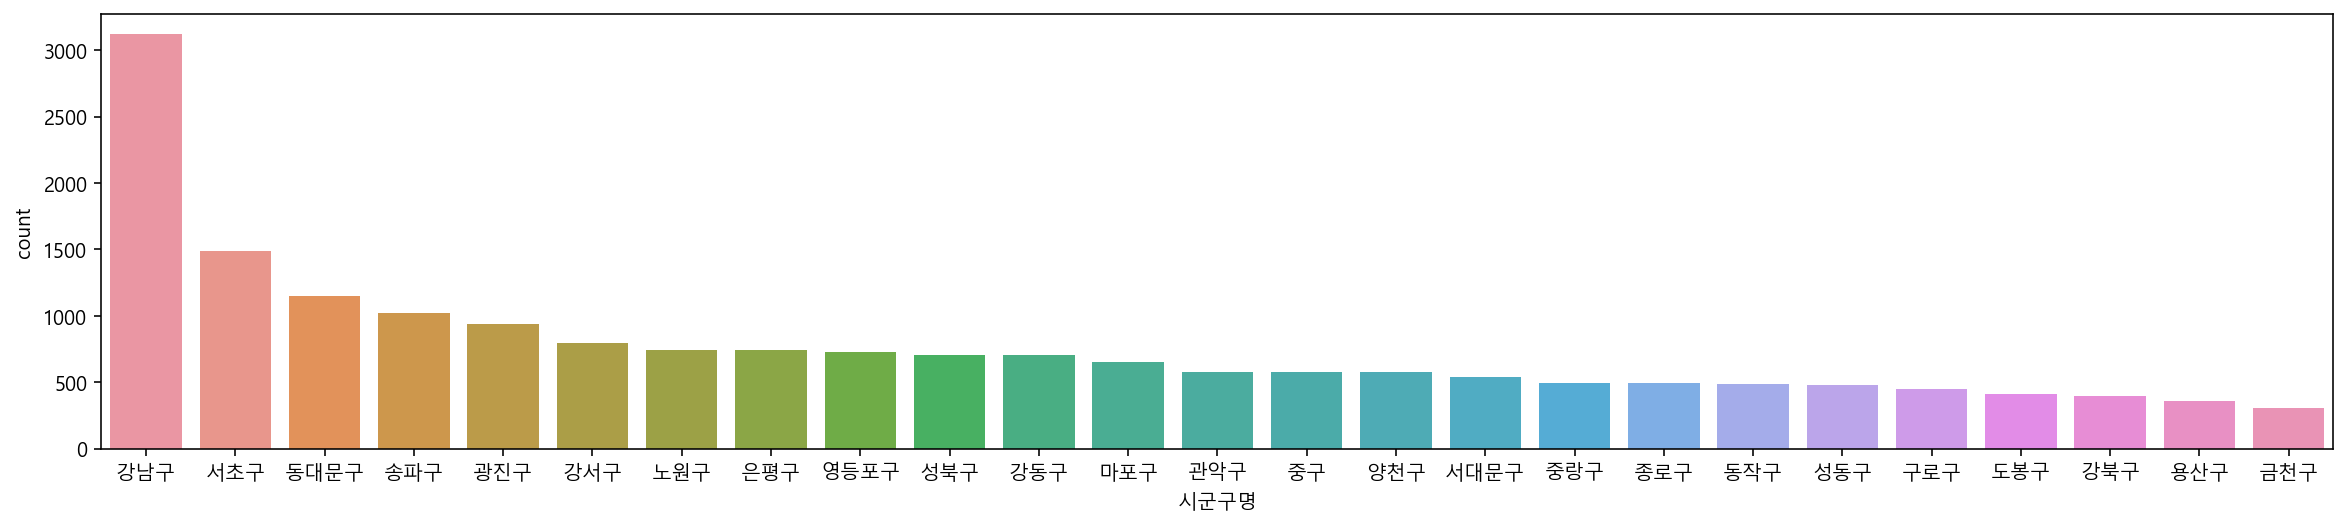

In [64]:
# seaborn을 활용해 보기
plt.figure(figsize = (20, 4))
sns.countplot(data = df_seoul, x = '시군구명', order = df_seoul['시군구명'].value_counts().index)

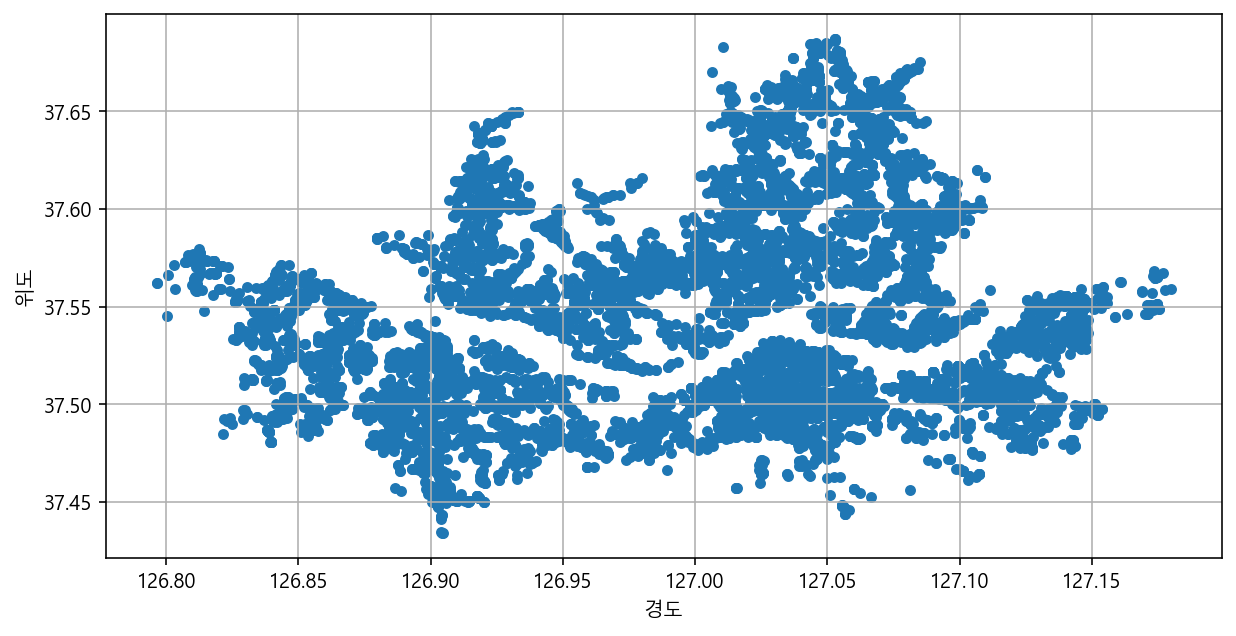

In [65]:
# pandas의 plot.scatter를 통해 경도와 위도를 표시
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x = '경도', y = '위도',figsize = (10,5), grid = True)

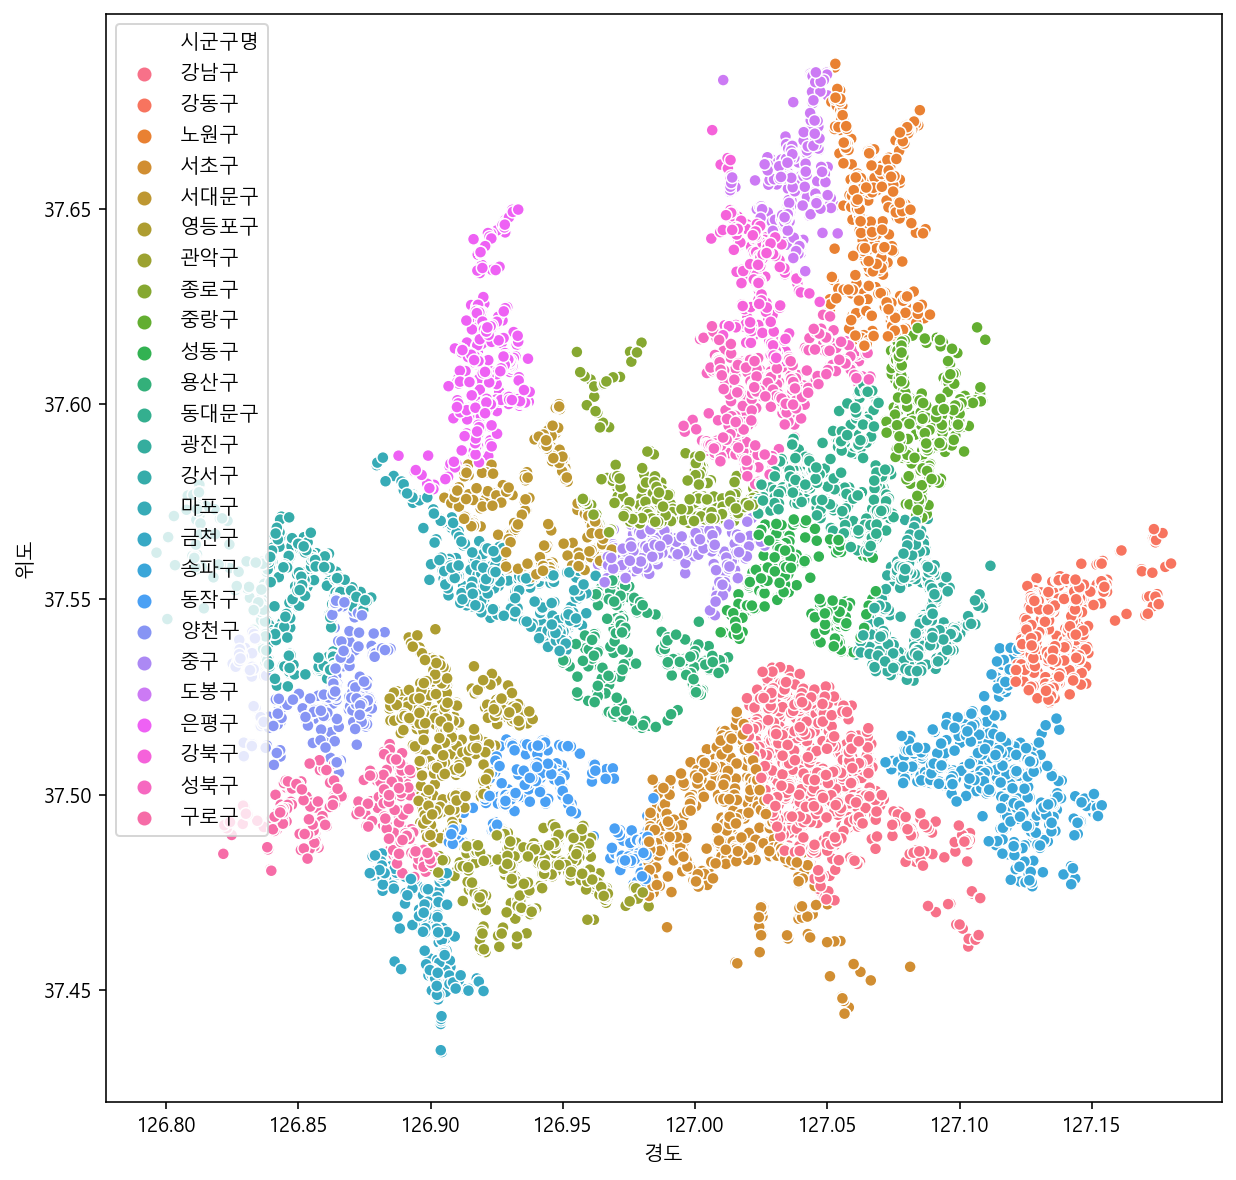

In [66]:
# seaborn의 scatterplot을 활용
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도', hue = '시군구명')
# hue 옵션은 포토샵의 기능으로 칼럼을 지정해 넣으면 칼럼의 내용대로 색이 지정되 출력 됨.

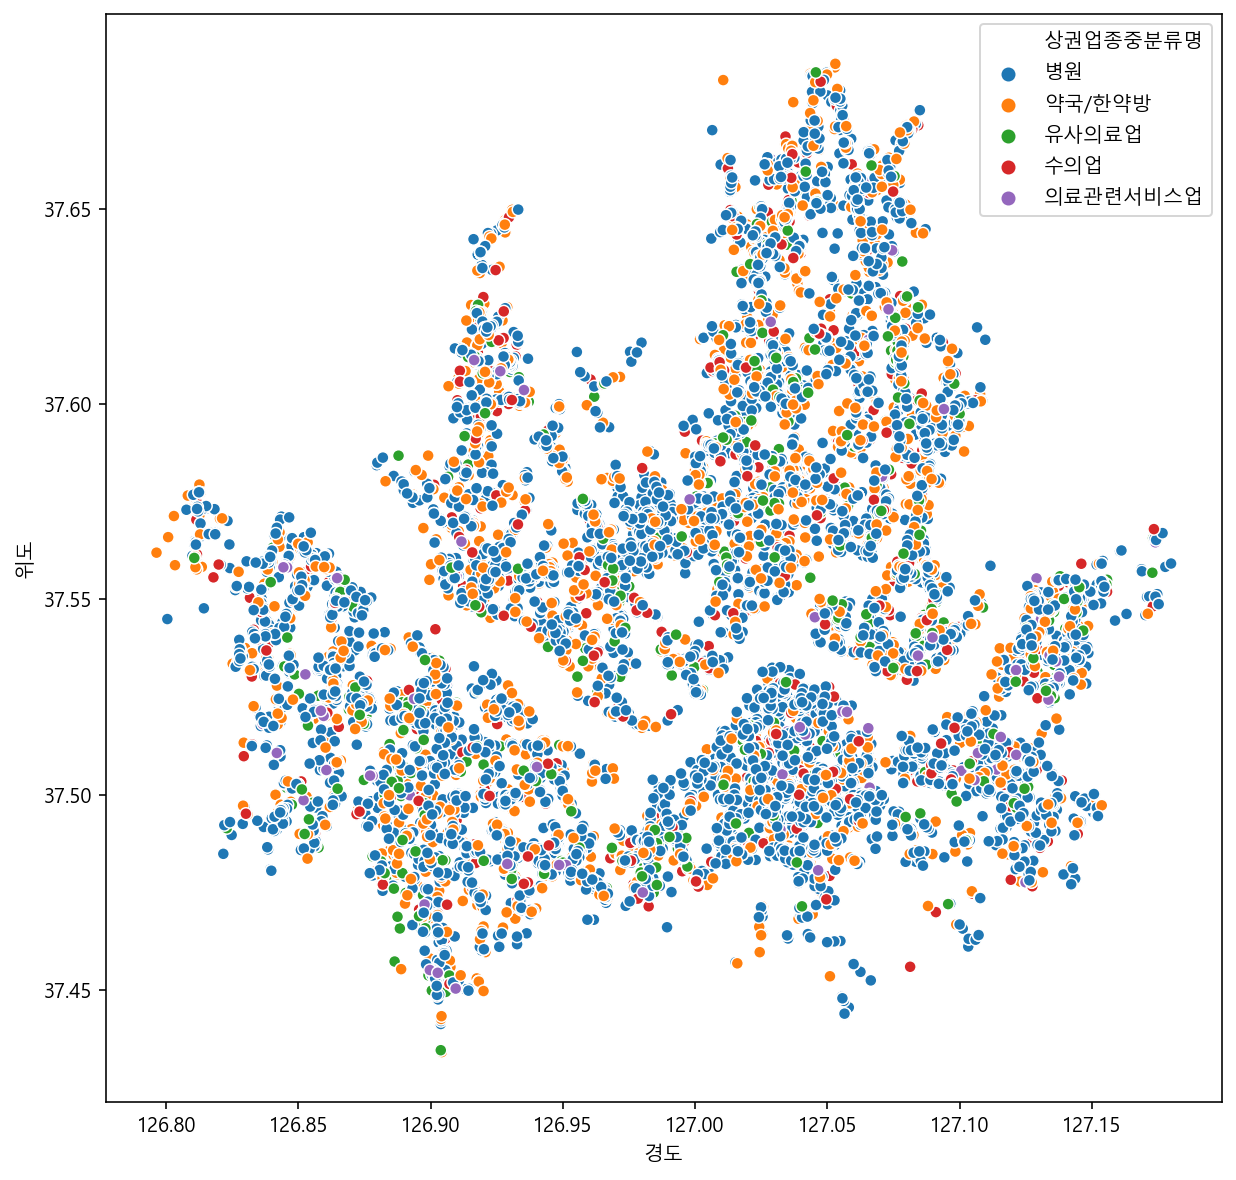

In [67]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도', hue = '상권업종중분류명')

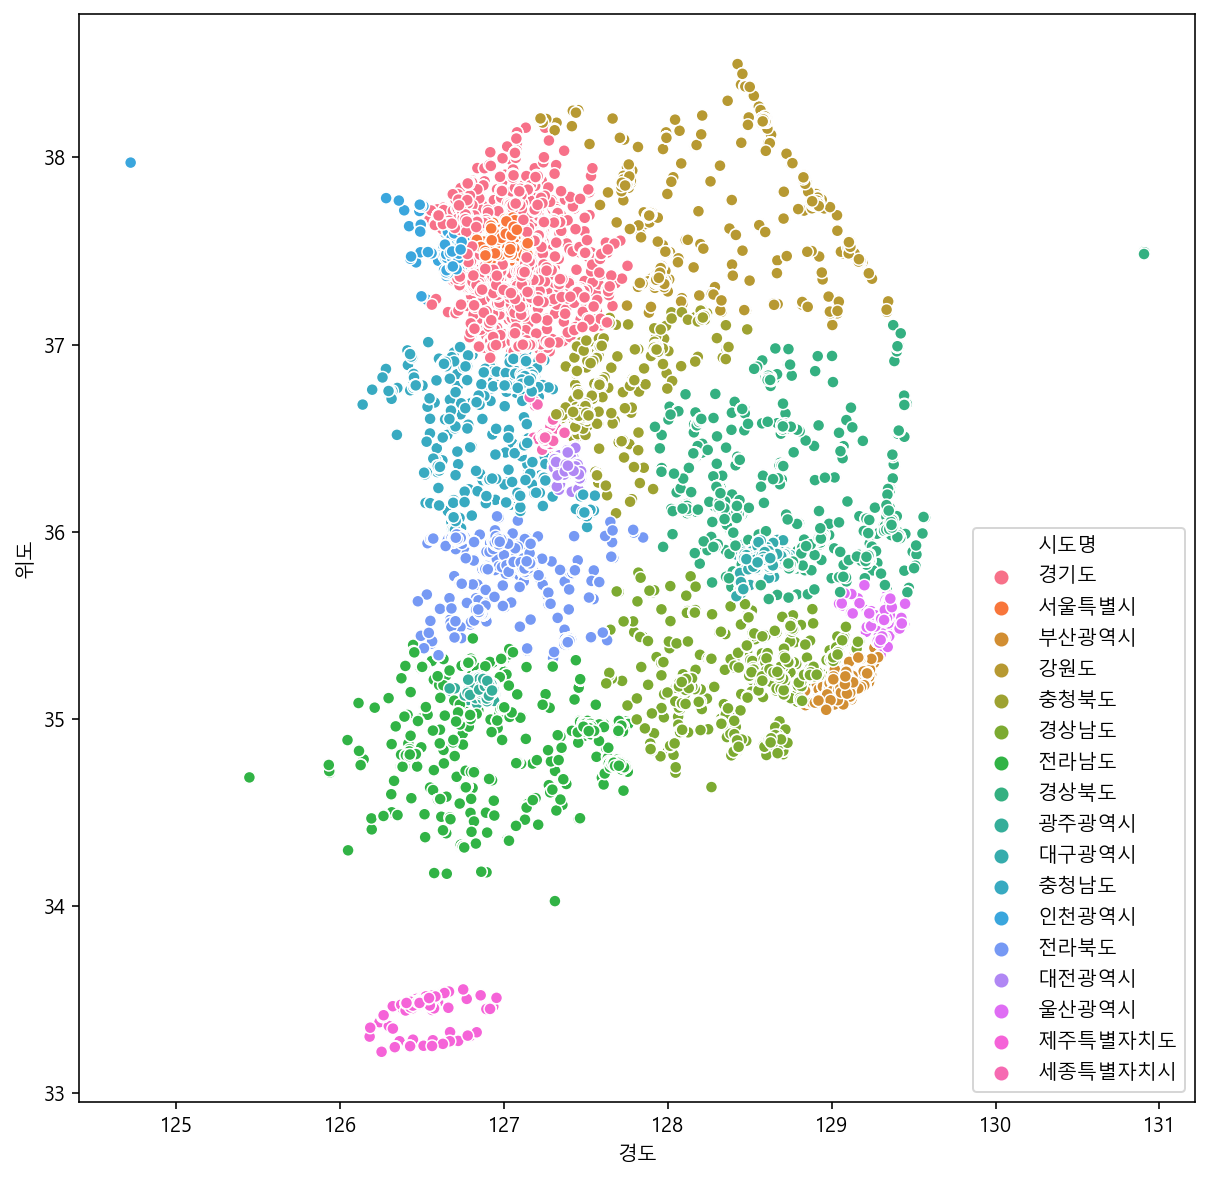

In [68]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df, x = '경도', y = '위도', hue = '시도명')
# 만약에 1000개만 샘플링해서 보고싶다면 'data = df[:1000]'로 바꾼다

# Folium을 활용한 시각화

In [74]:
import folium

# folium.Map() 세계지도 나옴
# m = Map(location = [위도, 경도]) 입력하면 입력한 위치를 중심으로 지도가 출력됨
# m.save('index.html') html로 저장
# folium.Map(title = 'Stamen Toner') 타일 색칠

In [77]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
print(df_seoul_hospital['위도'].mean())
df_seoul_hospital['경도'].mean()

37.52972276355594


126.9963589356625

In [89]:
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [91]:
map = folium.Map(location = [df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], zoom_start = 12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    adress = df_seoul_hospital.loc[n, '도로명주소']
    popup = f"{name}-{adress}"
    location = [df_seoul_hospital.loc[n, '위도'], df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map
# folium.Map(location = [37.52972276355594, 126.9963589356625])
# zoom_start 확대

In [93]:
map.save('서울종합병원위치.html')